In [1]:
import os, sys, getopt
from gspan import gSpan

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
def usage():
    print '\nUsage: python main.py [-s min_support] [-n num_graph] [-l min_num_vertices] [-u max_num_vertices] [-d] [-v] [-h] [-p] [-w] database_file_name'
    print '''\nOptions:\n
    -s, min support, default 5000\n
    -n, only read the first n graphs in the given database, default inf, i.e. all graphs\n
    -l, lower bound of number of vertices of output subgraph, default 2\n
    -u, upper bound of number of vertices of output subgraph, default inf\n
    -d, run for directed graphs, default off, i.e. for undirected graphs\n
    -v, verbose output, default off\n
    -p, plot frequent subgraph, default off\n
    -w, output where one frequent subgraph appears in database, default off\n
    -h, help\n
    '''

def parse_args(args, default_args):
    optlist, args = getopt.getopt(args, 'n:s:l:u:dvpw')
    opt_dict = {k:v for k, v in optlist}
    for k in ['-d', '-v', '-p', '-w']:
        opt_dict[k] = 0 if k not in opt_dict else 1
    try:
        for k in default_args:
            opt_dict[k] = default_args[k] if k not in opt_dict else int(opt_dict[k])
        opt_dict['database_file_name'] = default_args['database_file_name'] if len(args) == 0 else args[0]
        return opt_dict
    except Exception:
        usage()
        return

In [4]:
args_str = '-s 2 -d  -l 3 -p -w'
default_args = {'-n':float('inf'), '-s':10, '-l':2, '-u':float('inf'), '-d':0, '-p':0, '-w':0, 'database_file_name':'graphdata/graph.data.simple.5'}
opt_dict = parse_args(args_str.split(), default_args)
if not os.path.exists(opt_dict['database_file_name']):
    print '{} does not exist.'.format(opt_dict['database_file_name'])

In [5]:
gs = gSpan(database_file_name = opt_dict['database_file_name'], min_support = opt_dict['-s'],
    min_num_vertices = opt_dict['-l'], max_num_vertices = opt_dict['-u'], max_ngraphs = opt_dict['-n'],
    is_undirected = opt_dict['-d'] == 0, verbose = opt_dict['-v'] == 1,
    visualize = opt_dict['-p'] == 1, where = opt_dict['-w'] == 1)

t # 0
v 0 2
v 1 3
v 2 4
e 0 1 3
e 1 2 2

Support: 2


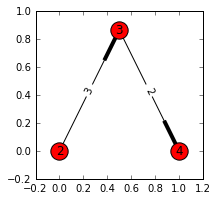

where: [0, 3]

-----------------

t # 1
v 0 2
v 1 2
v 2 2
e 0 1 2
e 0 2 2

Support: 2


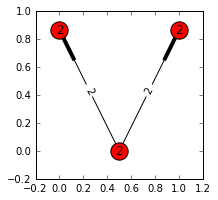

where: [0, 3]

-----------------

t # 2
v 0 2
v 1 2
v 2 3
e 0 1 2
e 1 2 3

Support: 2


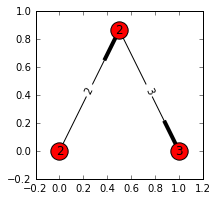

where: [0, 3]

-----------------

t # 3
v 0 2
v 1 2
v 2 3
v 3 4
e 0 1 2
e 1 2 3
e 2 3 2

Support: 2


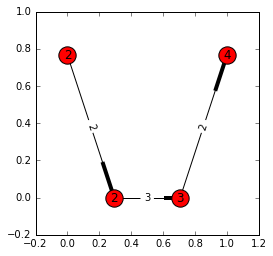

where: [0, 3]

-----------------

t # 4
v 0 2
v 1 2
v 2 3
v 3 4
v 4 2
e 0 1 2
e 0 4 2
e 1 2 3
e 2 3 2

Support: 2


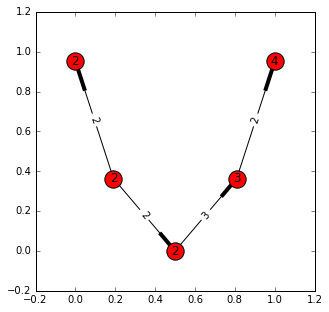

where: [0, 3]

-----------------

t # 5
v 0 2
v 1 2
v 2 3
v 3 2
e 0 1 2
e 0 3 2
e 1 2 3

Support: 2


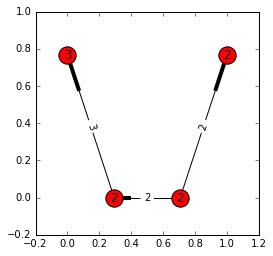

where: [0, 3]

-----------------

t # 6
v 0 2
v 1 2
v 2 3
e 0 1 2
e 0 2 3

Support: 2


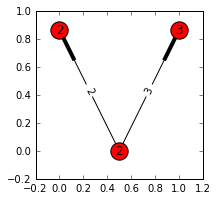

where: [0, 3]

-----------------

t # 7
v 0 2
v 1 2
v 2 3
v 3 4
e 0 1 2
e 0 2 3
e 2 3 2

Support: 2


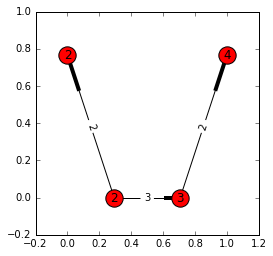

where: [0, 3]

-----------------

t # 8
v 0 2
v 1 2
v 2 2
e 0 1 2
e 1 2 2

Support: 2


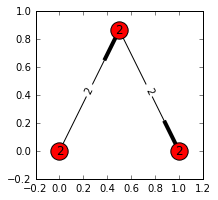

where: [0, 3]

-----------------

t # 9
v 0 2
v 1 2
v 2 2
v 3 3
e 0 1 2
e 1 2 2
e 1 3 3

Support: 2


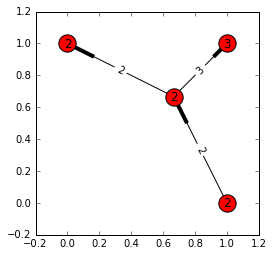

where: [0, 3]

-----------------

t # 10
v 0 2
v 1 2
v 2 2
v 3 3
v 4 2
e 0 1 2
e 0 4 2
e 1 2 2
e 1 3 3

Support: 2


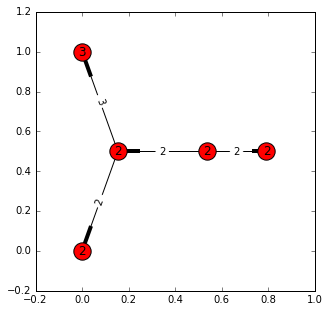

where: [0, 3]

-----------------

t # 11
v 0 2
v 1 2
v 2 2
v 3 3
v 4 4
e 0 1 2
e 1 2 2
e 1 3 3
e 3 4 2

Support: 2


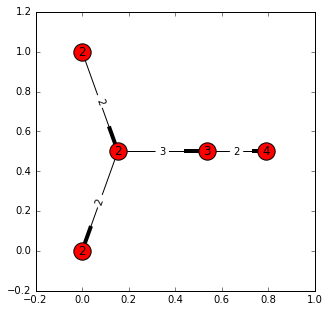

where: [0, 3]

-----------------

t # 12
v 0 2
v 1 2
v 2 2
v 3 3
v 4 4
v 5 2
e 0 1 2
e 0 5 2
e 1 2 2
e 1 3 3
e 3 4 2

Support: 2


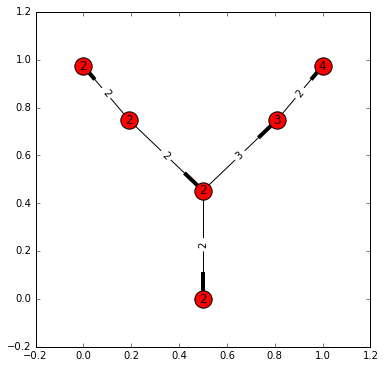

where: [0, 3]

-----------------

t # 13
v 0 2
v 1 2
v 2 2
v 3 2
e 0 1 2
e 0 3 2
e 1 2 2

Support: 2


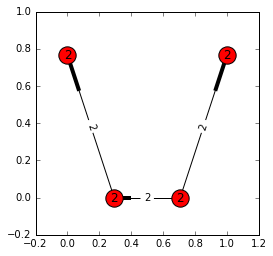

where: [0, 3]

-----------------

t # 14
v 0 2
v 1 2
v 2 2
e 0 1 5
e 0 2 5

Support: 2


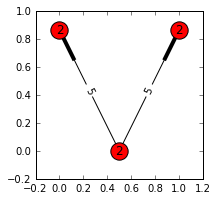

where: [2, 4]

-----------------



In [6]:
gs.run()

## plot graphs in database

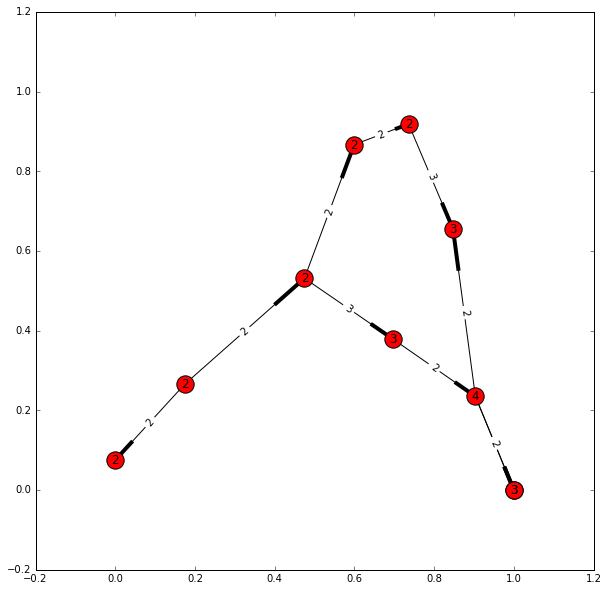

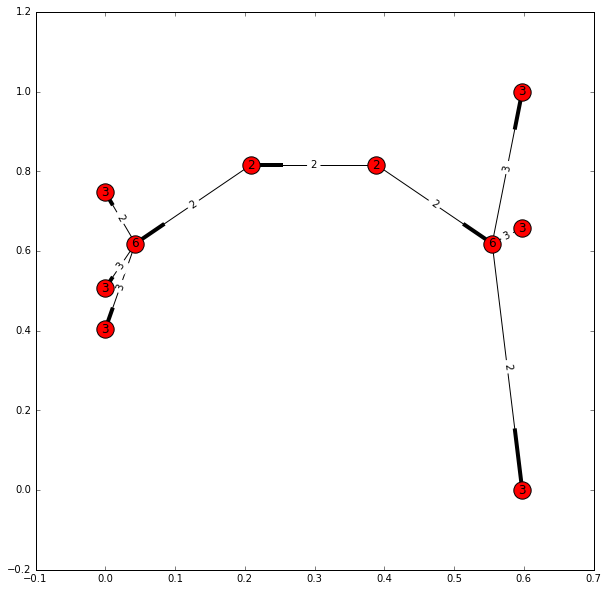

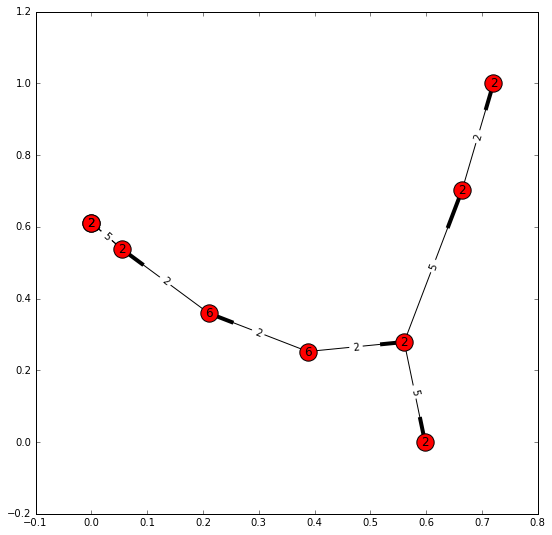

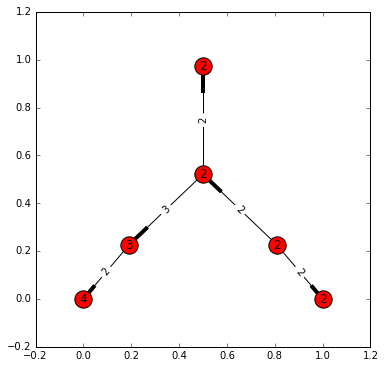

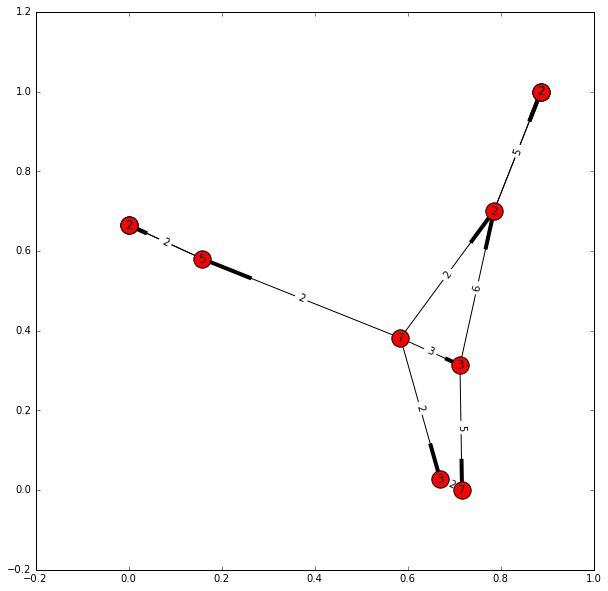

In [7]:
for g in gs.graphs.values():
    g.plot()